In [1]:
# 信用卡违约率分析
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
# 数据加载
data = pd.read_csv('./UCI_Credit_Card.csv')
# 数据探索
print(data.shape) # 查看数据集大小
print(data.describe()) # 数据集概览

(30000, 25)
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904  

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


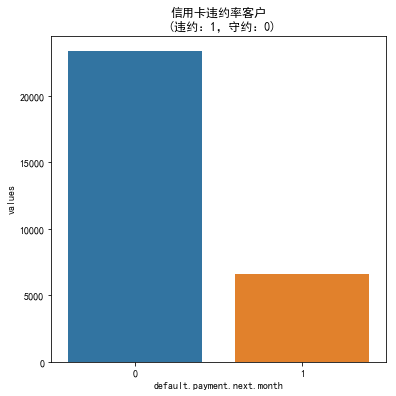

In [15]:
# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [16]:
# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop(['ID'], inplace = True, axis = 1) #ID这个字段没有用
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values
# 30%作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)

In [17]:
# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

In [18]:
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

D:\programfiles\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8174
准确率 0.8172


D:\programfiles\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8186
准确率 0.8113


D:\programfiles\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数： 0.7998
准确率 0.7994


D:\programfiles\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8040
准确率 0.8036
